In [1]:
#version de pytho usada
from platform  import python_version
print('version de python usada ', python_version())

version de python usada  3.6.9


In [0]:
!pip install watermark

In [1]:
#importando librerias
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import keras
import matplotlib
%matplotlib inline

Using TensorFlow backend.


In [2]:
%reload_ext watermark
%watermark -a "Christian Dayan Arcos Gordillo" --iversions

keras      2.3.1
matplotlib 3.2.1
numpy      1.18.3
tensorflow 2.2.0-rc4
Christian Dayan Arcos Gordillo


In [3]:
#cargando el datast MNIST
from keras.datasets import mnist

(X_train, y_train), (X_test,y_test) = mnist.load_data()
print('Total de ejemplos de entrenamiento ', X_train.shape[0])
print('total de ejemplos de teste ', X_test.shape[0])

Total de ejemplos de entrenamiento  60000
total de ejemplos de teste  10000


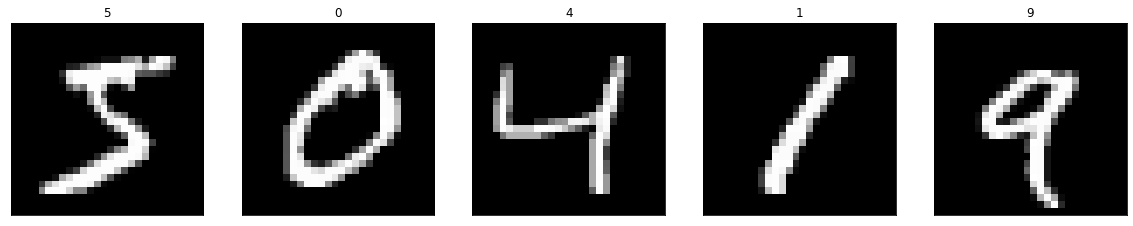

In [4]:
fig =plt.figure(figsize=(20,20))
for i in range(5):
  ax = fig.add_subplot(1,5, i+1, xticks=[], yticks=[])
  ax.imshow(X_train[i],cmap='gray')
  ax.set_title(str(y_train[i]))

In [0]:
#Visualizando una imágen en detalles
def visualizar(ima,ax):
  ax.imshow(ima,cmap='gray')
  width, height = ima.shape
  thres = ima.max()/2.5
  for x in range(width):
    for y in range(height):
      ax.annotate(str(round(ima[x][y],2)),xy=(y,x),
                  horizontalalignment = 'center',
                  verticalalignment = 'center',
                  color = 'white' if ima[x][y]<thres else 'black')

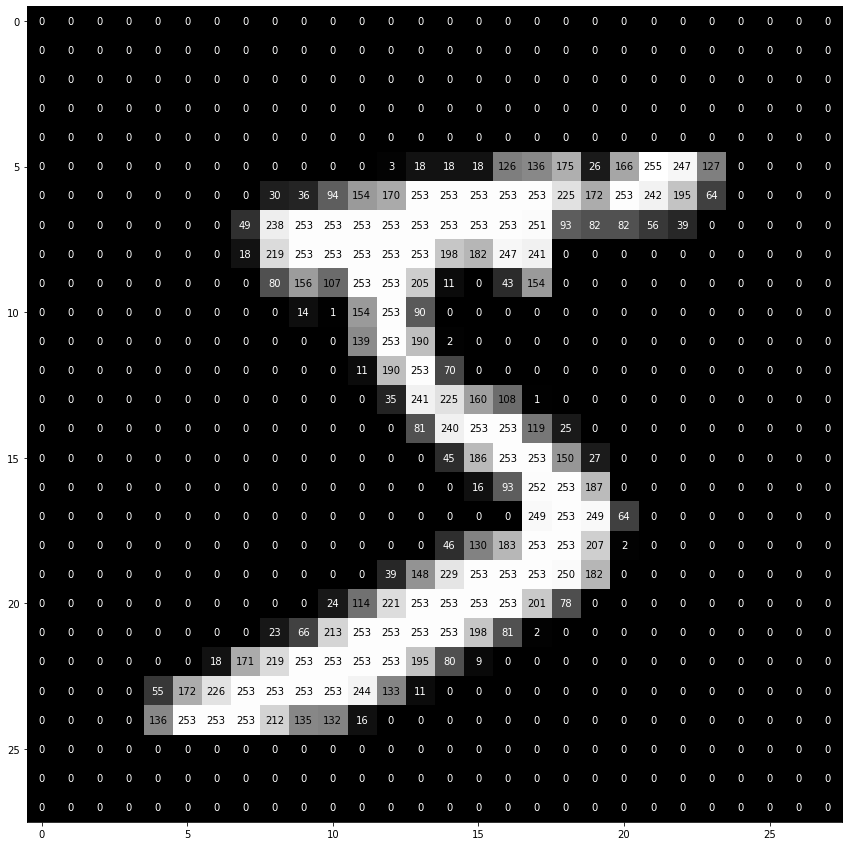

In [6]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
visualizar(X_train[0],ax)

In [0]:
#normalizar los pixel para que queden entre 0 y 1
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [8]:
#realizar codificacion one-hot-encodig para las etiquetas
from keras.utils import np_utils
print('etiquetas con valores enteros ', y_train[:10])

etiquetas con valores enteros  [5 0 4 1 9 2 1 3 1 4]


In [9]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

print('etiquetas codificadas')
print(y_train[:10])

etiquetas codificadas
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [10]:
#definiendo la arquitectura del modelo
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten

model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
________________________________________________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [18]:
#verificando como no generaliza nada si no se entrena el modelo
score = model.evaluate(X_test,y_test, verbose=0)
accuracy = 100*score[1] 
print('Precisión en Test sin entrenamiento %.4f%% ' %accuracy)

Precisión en Test sin entrenamiento 97.9300% 


In [0]:
# creando puntos de recuperación
from keras.callbacks import ModelCheckpoint

#checkpoint
checkpointer = ModelCheckpoint(filepath='mnist.model.thebest.hdf5', verbose=1, save_best_only=True)

In [14]:
#Entrenamiento
hist = model.fit(X_train,y_train,batch_size=128,epochs=10,validation_split=0.2,callbacks=[checkpointer], verbose=1,shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 147us/step - loss: 0.2766 - accuracy: 0.9139 - val_loss: 0.1304 - val_accuracy: 0.9585

Epoch 00001: val_loss improved from inf to 0.13040, saving model to mnist.model.thebest.hdf5
Epoch 2/10
48000/48000 [==============================] - 7s 147us/step - loss: 0.1116 - accuracy: 0.9653 - val_loss: 0.0936 - val_accuracy: 0.9718

Epoch 00002: val_loss improved from 0.13040 to 0.09362, saving model to mnist.model.thebest.hdf5
Epoch 3/10
48000/48000 [==============================] - 7s 147us/step - loss: 0.0784 - accuracy: 0.9768 - val_loss: 0.0835 - val_accuracy: 0.9772

Epoch 00003: val_loss improved from 0.09362 to 0.08349, saving model to mnist.model.thebest.hdf5
Epoch 4/10
48000/48000 [==============================] - 7s 147us/step - loss: 0.0610 - accuracy: 0.9814 - val_loss: 0.0900 - val_accuracy: 0.9769

Epoch 00004: val_loss did not improve from 0.08349
Epoch 5/10
48000

In [0]:
#cargando el modelo con los mejores pesos
model.load_weights('mnist.model.thebest.hdf5')

In [19]:
#claculando la clasificacion en test
score = model.evaluate(X_test,y_test, verbose=0)
accucary = 100*score[1]
print('Precisión en Test con entrenamiento %.4f%% ' %accuracy)


Precisión en Test con entrenamiento 97.9300% 
